<a href="https://colab.research.google.com/github/sehxxnee/AI/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Student Performance Prediction and Learning Strategy Recommendation System]

Fuzzy Logic: To predict grades based on study hours, test preparation, and attendance.


Artificial Neural Networks (ANN): For improving prediction accuracy.


Clustering: To group students based on learning habits and performance patterns.


Reinforcement Learning (RL): To recommend optimal study strategies in the recommendation system.


Natural Language Processing (NLP): To analyze student feedback and suggest improvements.







In [ ]:
!pip install scikit-fuzzy

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv('/content/drive/My Drive/StudentsPerformance.csv')

def preprocess_data(data):
    data = pd.get_dummies(data, columns=['gender', 'parental level of education', 'test preparation course'], drop_first=True)

    scaler = StandardScaler()
    numerical_cols = ['math score', 'reading score', 'writing score']
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    return data

data = preprocess_data(data)


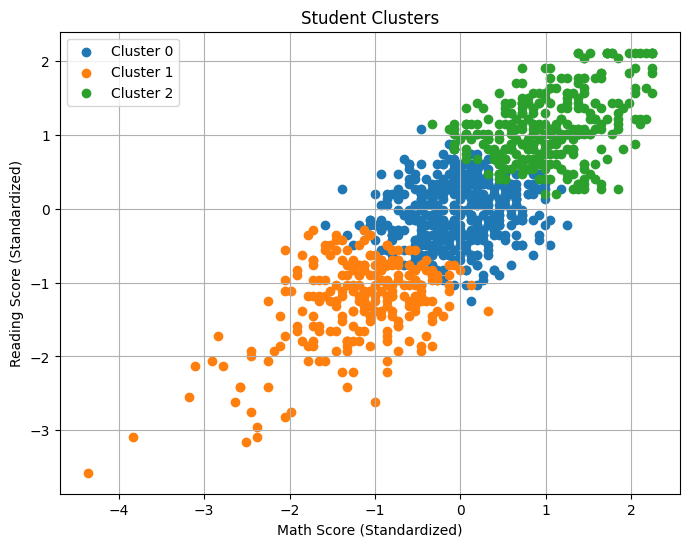

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Clustering using KMeans
X = data[['math score', 'reading score', 'writing score']].values
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = X[data['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')
plt.xlabel('Math Score (Standardized)')
plt.ylabel('Reading Score (Standardized)')
plt.title('Student Clusters')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# ANN model for grade prediction
def build_ann():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Predict normalized scores
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

X_train, X_test, y_train, y_test = train_test_split(X, data['math score'], test_size=0.2, random_state=42)
ann_model = build_ann()
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

y_pred = ann_model.predict(X_test)
print("ANN Mean Absolute Error:", np.mean(np.abs(y_test - y_pred.flatten())))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
ANN Mean Absolute Error: 0.00459958626820091


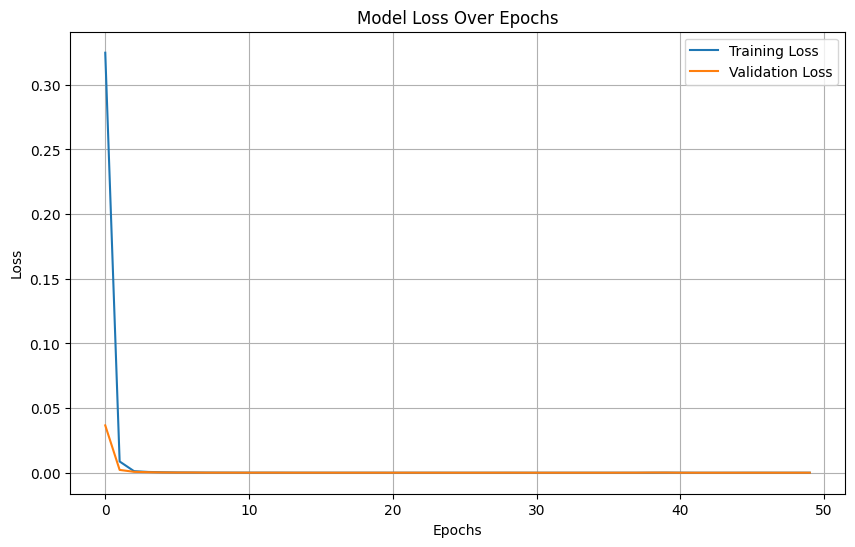

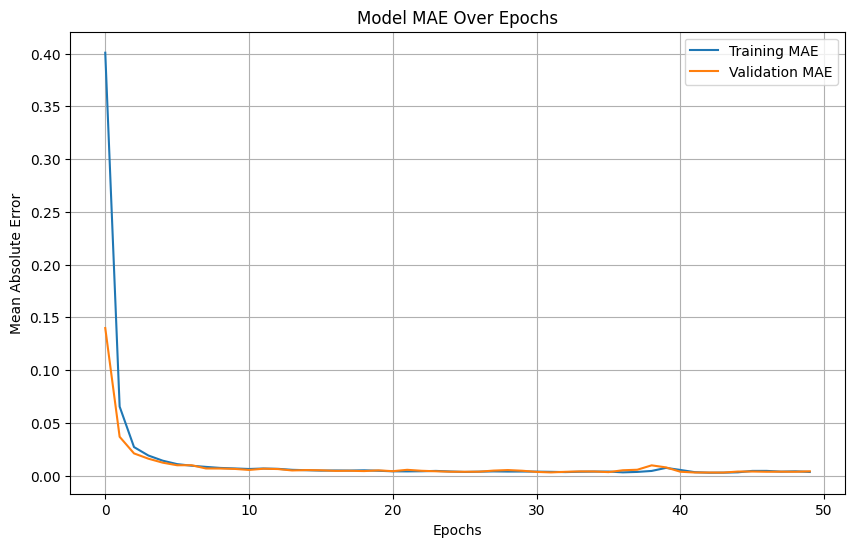

In [ ]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Model MAE Over Epochs')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import skfuzzy as fuzz
import numpy as np

# Fuzzy Logic for score recommendation
def fuzzy_logic_study_recommendation(hours_studied, test_preparation):
    hours = np.arange(0, 10, 1)
    preparation = np.arange(0, 10, 1)
    score = np.arange(0, 100, 1)

    # Membership functions
    hours_low = fuzz.trimf(hours, [0, 0, 5])
    hours_high = fuzz.trimf(hours, [3, 10, 10])
    prep_low = fuzz.trimf(preparation, [0, 0, 5])
    prep_high = fuzz.trimf(preparation, [3, 10, 10])

    score_low = fuzz.trimf(score, [0, 0, 50])
    score_high = fuzz.trimf(score, [50, 100, 100])

    rule1 = np.fmin(hours_low[hours_studied], prep_low[test_preparation])
    rule2 = np.fmin(hours_high[hours_studied], prep_high[test_preparation])

    score_activation_low = np.fmin(rule1, score_low)
    score_activation_high = np.fmin(rule2, score_high)

    aggregated = np.fmax(score_activation_low, score_activation_high)

    recommended_score = fuzz.defuzz(score, aggregated, 'centroid')

    return recommended_score

recommended_score = fuzzy_logic_study_recommendation(6, 8)
print(f"Recommended Score: {recommended_score}")


Recommended Score: 79.35858585858583


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

feedback = ["I struggled a lot with math.", "The course preparation was very helpful!"]
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(text)['compound'] for text in feedback]
print("Sentiment Analysis Scores:", sentiments)


Sentiment Analysis Scores: [-0.34, 0.5244]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
